Projekt jest analizą zbioru danych dotyczącego pasażerów statku Titanic. Celem projektu jest przewidzenie, czy dany pasażer przeżył katastrofę na podstawie różnych cech, takich jak wiek, klasa podróżna, płeć, numer biletu, opłata za bilet, kajuta, i port wejścia na pokład.

Pierwsza część projektu obejmuje wstępną obróbkę danych, która zawiera usuwanie zbędnych znaków, konwersję danych tekstowych na numeryczne, a także wstępną analizę brakujących danych. Kolejnym krokiem jest przygotowanie danych do modelowania, co obejmuje wybór odpowiednich cech i podział zbioru danych na zestawy treningowe i testowe.

In [569]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler

def remove_tabs(x):
    return ''.join([i for i in x if i != '\t'])


def extract_numbers(x):
    result = ''.join([i for i in str(x) if i.isdigit()])
    return int(result) if result else 0

def convert_cabins(x):
    result = ''.join([i if i.isdigit() else str(ord(i) - 64) if i.isalpha() and i.upper() in ['A', 'B', 'C', 'D', 'E', 'F', 'G'] else '8' if i.upper() == 'T' else '' for i in str(x)])
    return int(result) if result else 0

def convert_embarked(x):
    return {'C': 1, 'Q': 2, 'S': 3}.get(x, 0)

def prepare_data_and_train_model(data, features):
    data = data.dropna(subset=["Age"])
    data_training, data_testing = train_test_split(data, test_size=0.2)

    scaler = StandardScaler()
    data_training_scaled = scaler.fit_transform(data_training[features])
    data_testing_scaled = scaler.transform(data_testing[features])

    y_train = data_training["Survived"]
    x_train = data_training_scaled
    model = LogisticRegression()
    model.fit(x_train, y_train)

    y_expected = data_testing["Survived"]
    x_test = data_testing_scaled
    y_predicted = model.predict(x_test)

    error_1 = mean_squared_error(y_expected, y_predicted)
    error_2 = mean_absolute_error(y_expected, y_predicted)
    score = model.score(x_test, y_expected)

    return model, scaler, y_predicted, error_1, error_2, score

data = pd.read_csv(
    "titanic.tsv",
    header=0,
    sep="\t",
    usecols=["Survived", "PassengerId", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"],
)
data["Name"] = data["Name"].apply(remove_tabs)


print(data[:])



     Survived  PassengerId  Pclass  \
0           0          530       2   
1           0          466       3   
2           0          753       3   
3           0          855       2   
4           0          333       1   
..        ...          ...     ...   
618         0          660       1   
619         1           85       2   
620         1          521       1   
621         1          644       3   
622         1          831       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                      Hocking Mr. Richard George    male  23.0      2      1   
1                  Goncalves Mr. Manuel Estanslas    male  38.0      0      0   
2                 Vande Velde Mr. Johannes Joseph    male  33.0      0      0   
3    Carter Mrs. Ernest Courtenay (Lilian Hughes)  female  44.0      1      0   
4                        Graham Mr. George Edward    male  38.0      0      1   
..                                            ...     ...

Ważną częścią projektu również była analiza danych i ich wizualizacja. Obejmuje ona wykorzystanie wykresów, takich jak histogramy i wykresy słupkowe, aby wizualnie przedstawić zależności między różnymi cechami pasażerów Titanica, takimi jak klasa podróżna czy płeć. Statystyki, takie jak średni wiek i odsetek przeżycia, dostarczają liczbowego podsumowania danych, umożliwiając lepsze zrozumienie charakterystyk zbioru oraz wsparcie dla procesu modelowania i interpretacji wyników.

ANALIZA I WIZUALIZACJA DANYCH

Wykres przeżycia w zależności od klasy podróżnej

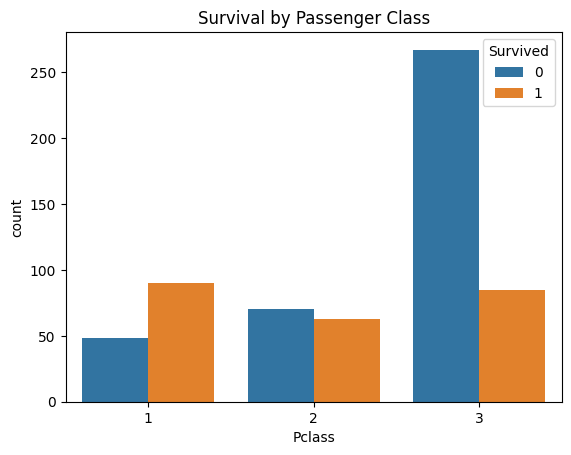

In [570]:
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')
plt.show()

Wykres przeżycia w zależności od płci

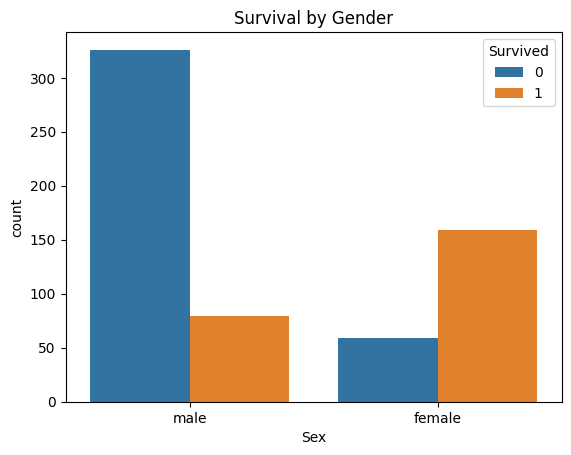

In [571]:
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Gender')
plt.show()

Histogram wieku pasażerów

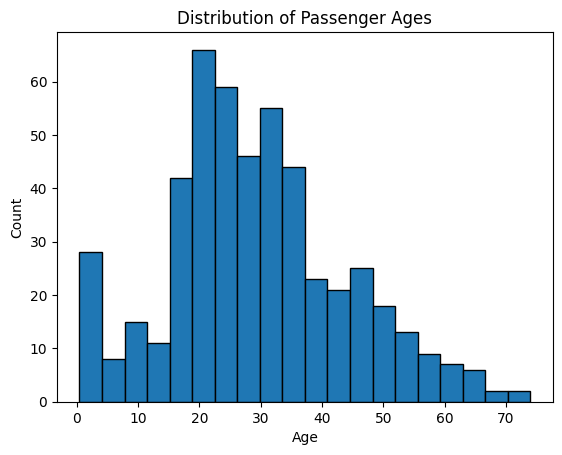

In [572]:
plt.hist(data['Age'].dropna(), bins=20, edgecolor='black')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Wykres przeżycia w zależności od liczby rodzeństwa/małżonków na pokładzie (SibSp)

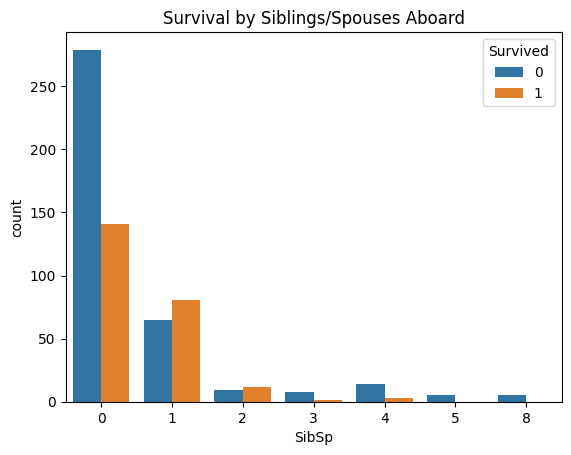

In [573]:
sns.countplot(x='SibSp', hue='Survived', data=data)
plt.title('Survival by Siblings/Spouses Aboard')
plt.show()

Wykres przeżycia w zależności od liczby rodziców/dzieci na pokładzie (Parch)

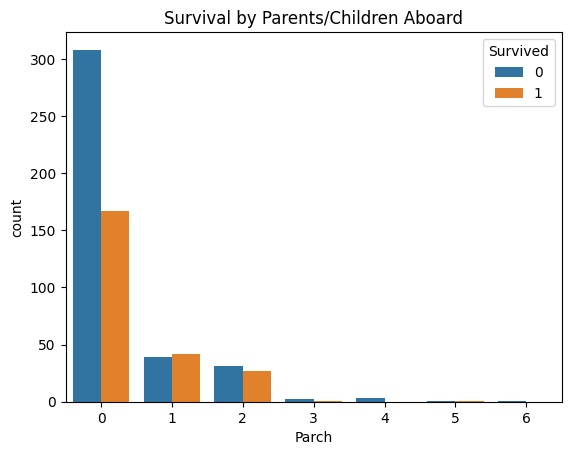

In [574]:
sns.countplot(x='Parch', hue='Survived', data=data)
plt.title('Survival by Parents/Children Aboard')
plt.show()

Wykres przeżycia w zależności od liczby osób podróżujących razem (Family Size)

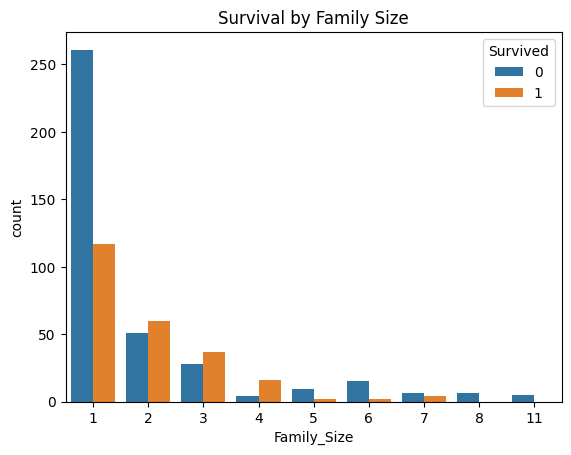

In [575]:
data['Family_Size'] = data['SibSp'] + data['Parch'] + 1
sns.countplot(x='Family_Size', hue='Survived', data=data)
plt.title('Survival by Family Size')
plt.show()

Wykres przeżycia w zależności od opłaty za bilet

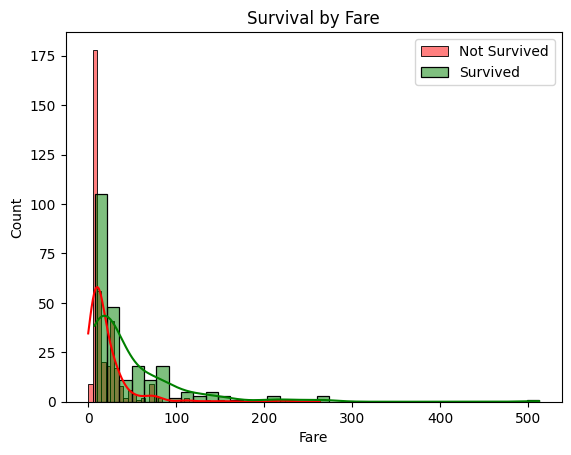

In [576]:
sns.histplot(data[data['Survived'] == 0]['Fare'], color='red', label='Not Survived', kde=True)
sns.histplot(data[data['Survived'] == 1]['Fare'], color='green', label='Survived', kde=True)
plt.title('Survival by Fare')
plt.legend()
plt.show()

Wykres rozkładu wieku w zależności od przeżycia

C:\Users\kubar\AppData\Local\Temp\ipykernel_24080\4068641690.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Survived'] == 0]['Age'], color='red', label='Not Survived', shade=True)
C:\Users\kubar\AppData\Local\Temp\ipykernel_24080\4068641690.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Survived'] == 1]['Age'], color='green', label='Survived', shade=True)


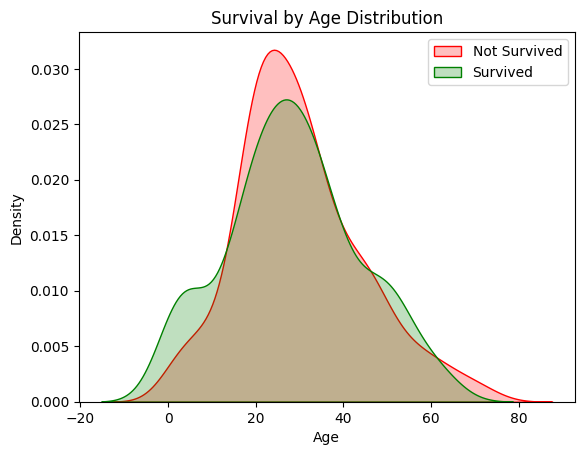

In [577]:
sns.kdeplot(data[data['Survived'] == 0]['Age'], color='red', label='Not Survived', shade=True)
sns.kdeplot(data[data['Survived'] == 1]['Age'], color='green', label='Survived', shade=True)
plt.title('Survival by Age Distribution')
plt.legend()
plt.show()

STATYSTYKI

Wiek pasażerów

In [578]:
median_age = data['Age'].median()
print(f'Median Age: {median_age:.2f}')

mode_age = data['Age'].mode()[0]
print(f'Mode Age: {mode_age:.2f}')

iqr_age = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
print(f'Interquartile Range of Age: {iqr_age:.2f}')

Median Age: 28.00
Mode Age: 22.00
Interquartile Range of Age: 18.00


Odsetek przeżycia ogółem

In [579]:
survival_rate = data['Survived'].mean() * 100
print(f'Survival Rate: {survival_rate:.2f}%')

Survival Rate: 38.20%


Średnia opłata za bilet

In [580]:
median_fare = data['Fare'].median()
print(f'Median Fare: {median_fare:.2f}')


mode_fare = data['Fare'].mode()[0]
print(f'Mode Fare: {mode_fare:.2f}')

iqr_fare = data['Fare'].quantile(0.75) - data['Fare'].quantile(0.25)
print(f'Interquartile Range of Fare: {iqr_fare:.2f}')

Median Fare: 14.45
Mode Fare: 13.00
Interquartile Range of Fare: 22.57


Odsetek przeżycia według portu wejścia na pokład (Embarked)

In [581]:
embarked_survival_rate = data.groupby('Embarked')['Survived'].mean() * 100
print('Survival Rate by Embarked Port:')
print(embarked_survival_rate)

Survival Rate by Embarked Port:
Embarked
C    52.542373
Q    36.000000
S    34.437086
Name: Survived, dtype: float64


Procentowy udział płci

In [582]:
gender_distribution = data['Sex'].value_counts(normalize=True) * 100
print('Gender Distribution:')
print(gender_distribution)

Gender Distribution:
Sex
male      65.008026
female    34.991974
Name: proportion, dtype: float64


Odsetek przeżycia według klasy podróżnej

In [583]:
pclass_survival_rate = data.groupby('Pclass')['Survived'].mean() * 100
print('Survival Rate by Passenger Class:')
print(pclass_survival_rate)

Survival Rate by Passenger Class:
Pclass
1    65.217391
2    47.368421
3    24.147727
Name: Survived, dtype: float64


Średni wiek z podziałem na płeć

In [584]:
mean_age_by_gender = data.groupby('Sex')['Age'].mean()
print('Mean Age by Gender:')
print(mean_age_by_gender)

Mean Age by Gender:
Sex
female    28.378492
male      29.900343
Name: Age, dtype: float64


Następnie projekt obejmuje stworzenie czterech modeli regresji logistycznej, z różnymi zestawami cech. Modele są trenowane na danych treningowych, a następnie oceniane na danych testowych za pomocą miar błędu średniokwadratowego, błędu bezwzględnego i ogólnej skuteczności modelu.

Przygotowanie danych do tworzenia modeli

In [585]:
data["Sex"] = data["Sex"].apply(lambda x: 0 if x == 'male' else 1)
data["Ticket"] = data["Ticket"].apply(lambda x: int(x) if str(x).isdigit() else extract_numbers(x))
data["Cabin"] = data["Cabin"].apply(convert_cabins)
data["Embarked"] = data["Embarked"].apply(convert_embarked)

Wykres korelacji cech numerycznych

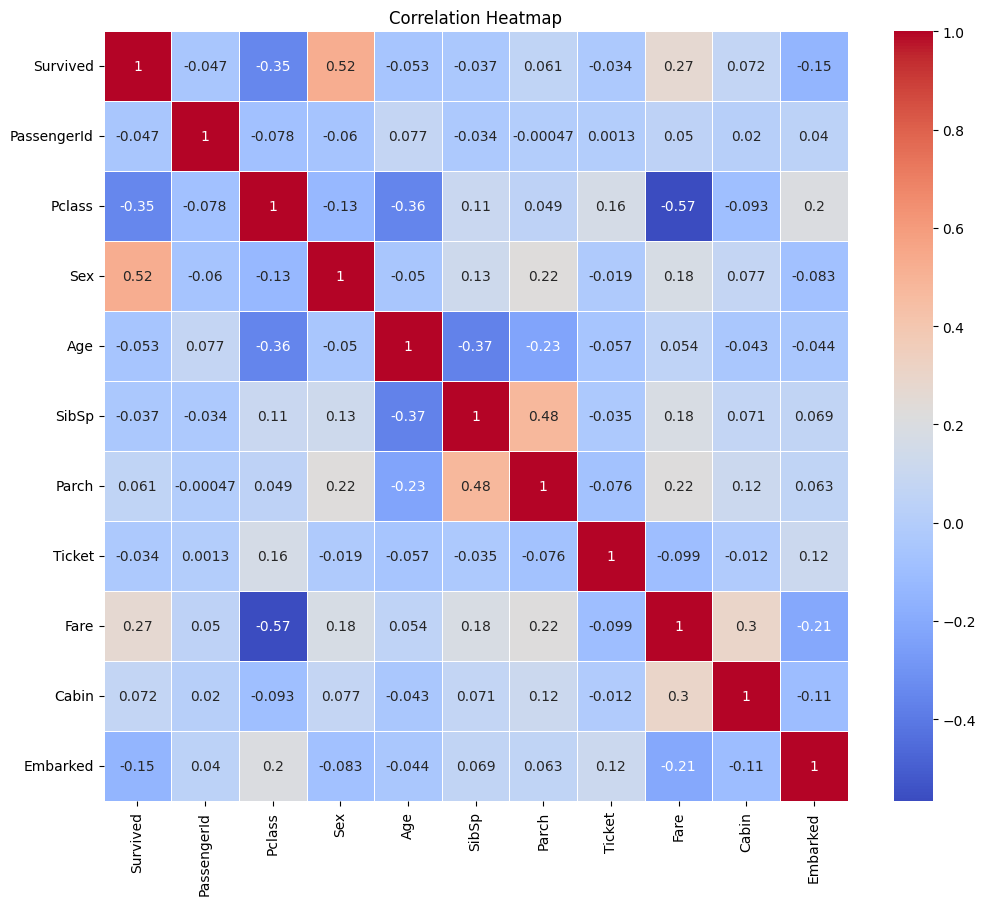

In [586]:
data_heat=data[["Survived", "PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]]
plt.figure(figsize=(12, 10))
sns.heatmap(data_heat.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

MODEL 1: (dla wszystkich cech)

In [587]:
features_1 = ["PassengerId", "Pclass", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]
model_1,scaler_1,y_predicted_1, error1_1, error1_2, score_1 = prepare_data_and_train_model(data, features_1)

print(y_predicted_1[:])
print(f"Mean Squared Error: {error1_1}")
print(f"Mean Absolute Error: {error1_2}")
print("Model Score: ", score_1)

[0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0]
Mean Squared Error: 0.24
Mean Absolute Error: 0.24
Model Score:  0.76


MODEL 2: Płeć i wiek (co zapewne miało realny wpływ na przeżycie danej osoby)

In [588]:
features_2 = ["Sex", "Age"]
model_2,scaler_2,y_predicted_2, error2_1, error2_2, score_2 = prepare_data_and_train_model(data, features_2)

print(y_predicted_2[:])
print(f"Mean Squared Error: {error2_1}")
print(f"Mean Absolute Error: {error2_2}")
print("Model Score: ", score_2)

[1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0
 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0
 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0]
Mean Squared Error: 0.23
Mean Absolute Error: 0.23
Model Score:  0.77


MODEL 3: Klasa biletu i opłata za bilet (też mogły mieć wpływ)

In [589]:
features_3 = ["Pclass", "Fare"]
model_3,scaler_3,y_predicted_3, error3_1, error3_2, score_3 = prepare_data_and_train_model(data, features_3)

print(y_predicted_3[:])
print(f"Mean Squared Error: {error3_1}")
print(f"Mean Absolute Error: {error3_2}")
print("Model Score: ", score_3)

[0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0
 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0]
Mean Squared Error: 0.31
Mean Absolute Error: 0.31
Model Score:  0.69


MODEL 4: Zarówno płeć i wiek, jak i klasa biletu i opłata za bilet

In [590]:
features_4 = ["Sex", "Age","Pclass", "Fare"]
model_4, scaler_4, y_predicted_4, error4_1, error4_2, score_4 = prepare_data_and_train_model(data, features_4)

print(y_predicted_4[:])
print(f"Mean Squared Error: {error4_1}")
print(f"Mean Absolute Error: {error4_2}")
print("Model Score: ", score_4)


[0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0]
Mean Squared Error: 0.23
Mean Absolute Error: 0.23
Model Score:  0.77


Podsumowując - model 4, w których cechami są wszystkie te elementy, które miały istotny wpływ na przeżycie danej osoby radzi sobie najlepiej. Można wykorzystać go do predykcji przeżycia osoby, której dane zostały podane przez użytkownika.

In [674]:

def predict_survival(model, scaler, features):
    features_scaled = scaler.transform(features)
    prediction = model.predict(features_scaled)
    return prediction


sex = int(input("Enter gender (0 for male, 1 for female): "))
age = float(input("Enter age: "))
pclass = int(input("Enter passenger class (1, 2, or 3): "))
fare = float(input("Enter ticket fare: "))

user_data = [[sex,age, pclass, fare]]


prediction_result = predict_survival(model_4, scaler_4, user_data)


if prediction_result[0] == 1:
    print("The model predicts that the passenger will survive.")
else:
    print("The model predicts that the passenger will not survive.")


The model predicts that the passenger will survive.


C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [841]:
import numpy as np

def generate_random_data(num_samples=10):
    random_data = []

    for _ in range(num_samples):
        sex = np.random.choice([0, 1])
        age = np.random.randint(0, 101)
        pclass = np.random.choice([1, 2, 3])
        fare = np.random.uniform(0, 500)

        random_data.append([sex, age, pclass, fare])

    return np.array(random_data)


random_data = generate_random_data()

predictions = model_4.predict(random_data)


print(random_data)

print("Predictions for 10 random inputs:")
print(predictions)

[[  0.          92.           2.         418.97082106]
 [  0.          58.           3.         288.1106466 ]
 [  0.          60.           1.         209.26711647]
 [  0.          53.           2.          17.82277353]
 [  1.          37.           2.         379.7309119 ]
 [  0.          97.           1.         439.90453589]
 [  0.           3.           3.         345.36672556]
 [  0.          90.           1.         321.97042601]
 [  0.          41.           2.         240.91588251]
 [  0.           2.           2.         156.32731753]]
Predictions for 10 random inputs:
[0 0 0 0 0 0 0 0 0 0]
